# This file runs on ***Google Colab***
## Before running this file, the Data File needs to be placed at the same level as this file

### Data file: ../PySpark_DataFile/hotel_reviews_for_NLP2_int_review_score.zip/hotel_reviews_for_NLP2_int_review_score.csv


In [1]:
# Import our dependencies
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [2]:
# Reading data into a pandas DataFrame
df = pd.read_csv('hotel_reviews_for_NLP4_Star_Rating.csv')
df

,Review,Star_Rating
0,I am so angry that i made this post available...,2
1,No real complaints the hotel was great great ...,4
2,Rooms are nice but for elderly a bit difficul...,4
3,My room was dirty and I was afraid to walk ba...,2
4,You When I booked with your company on line y...,4
...,...,...
512338,no trolly or staff to help you take the lugga...,4
512339,The hotel looks like 3 but surely not 4 Brea...,3
512340,The ac was useless It was a hot week in vienn...,1
512341,The rooms are enormous and really comfortable...,5


In [3]:
# Split our preprocessed data into our features/input and target/output arrays
y = df['Star_Rating'].values
X = df.drop(['Star_Rating'],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [4]:
# Compile, Train and Evaluate the Model
model = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(model, output_shape=[8], input_shape=[], dtype=tf.string, trainable=True)
model = tf.keras.Sequential()

# First hidden layer
model.add(hub_layer)

# Second hidden layer
model.add(tf.keras.layers.Dense(units=3, activation='relu'))

# Output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense (Dense)                (None, 3)                 63        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 400,087
Trainable params: 400,087
Non-trainable params: 0
_________________________________________________________________


In [5]:
# compile the model
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [10]:
# Fit/Train the model
fit_model = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
12009/12009 [==============================] - 116s 10ms/step - loss: -3.0891 - accuracy: 0.0042
Epoch 2/10
12009/12009 [==============================] - 108s 9ms/step - loss: -3.0891 - accuracy: 0.0042
Epoch 3/10
12009/12009 [==============================] - 109s 9ms/step - loss: -3.0891 - accuracy: 0.0042
Epoch 4/10
12009/12009 [==============================] - 110s 9ms/step - loss: -3.0891 - accuracy: 0.0042
Epoch 5/10
12009/12009 [==============================] - 109s 9ms/step - loss: -3.0891 - accuracy: 0.0042
Epoch 6/10
12009/12009 [==============================] - 108s 9ms/step - loss: -3.0891 - accuracy: 0.0042
Epoch 7/10
12009/12009 [==============================] - 108s 9ms/step - loss: -3.0891 - accuracy: 0.0042
Epoch 8/10
12009/12009 [==============================] - 108s 9ms/step - loss: -3.0891 - accuracy: 0.0042
Epoch 9/10
12009/12009 [==============================] - 105s 9ms/step - loss: -3.0891 - accuracy: 0.0042
Epoch 10/10
12009/12009 [===========

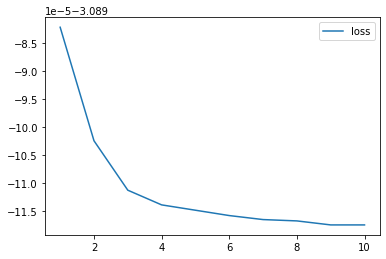

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

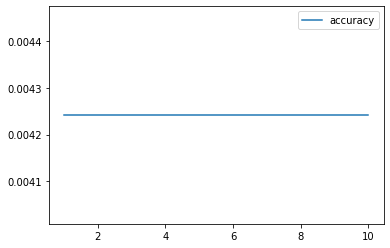

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Test/Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

4003/4003 - 8s - loss: -3.0885e+00 - accuracy: 0.0043
Loss: -3.088472843170166, Accuracy: 0.004325218964368105


In [14]:
# Export our model to HDF5 file
model.save("SavedModel2_NLP_DL_Review_in_Star_Rating_Format.h5")

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))